In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
train_df=pd.read_csv("gdrive/My Drive/bankdata/train_indessa.csv")
test_df=pd.read_csv("gdrive/My Drive/bankdata/test_indessa.csv")

In [0]:
train_df.shape

(532428, 45)

In [0]:
test_df.shape

(354951, 44)

In [0]:
train_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [0]:
train_df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [0]:
train_df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

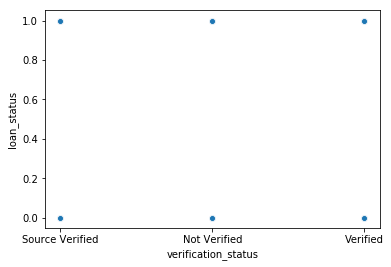

In [0]:
sns.scatterplot(train_df['verification_status'],train_df['loan_status'])

In [0]:
pd.crosstab(train_df['loan_status'],train_df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
0,115028,161329,130244
1,44948,36421,44458


In [0]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train_df['loan_status'],train_df['verification_status']))

(5065.261321164635,
 0.0,
 2,
 array([[122169.38548686, 151016.37733177, 133415.23718137],
        [ 37806.61451314,  46733.62266823,  41286.76281863]]))

has no sgnificance

In [0]:
train_df['delinq_2yrs'].value_counts()

0.0     430104
1.0      67947
2.0      20167
3.0       7269
4.0       3159
5.0       1622
6.0        898
7.0        451
8.0        266
9.0        166
10.0       116
11.0        73
12.0        61
13.0        37
14.0        28
15.0        14
16.0         9
18.0         8
17.0         6
19.0         4
21.0         2
30.0         1
22.0         1
26.0         1
27.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

In [0]:
train_df.drop(columns=['member_id','batch_enrolled','emp_title','grade','desc','zip_code','addr_state','initial_list_status','verification_status_joint','title','mths_since_last_record','verification_status','delinq_2yrs'],inplace=True)

In [0]:
test_df.drop(columns=['member_id','batch_enrolled','emp_title','grade','desc','zip_code','addr_state','initial_list_status','verification_status_joint','title','mths_since_last_record','verification_status','delinq_2yrs'],inplace=True)

In [0]:
train_df.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
sub_grade                           0
emp_length                      26891
home_ownership                      0
annual_inc                          3
pymnt_plan                          0
purpose                             0
dti                                 0
inq_last_6mths                     16
mths_since_last_delinq         272554
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
application_type                    0
last_week_pa

In [0]:
test_df.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
sub_grade                           0
emp_length                      17934
home_ownership                      0
annual_inc                          1
pymnt_plan                          0
purpose                             0
dti                                 0
inq_last_6mths                     13
mths_since_last_delinq         181758
open_acc                           13
pub_rec                            13
revol_bal                           0
revol_util                        215
total_acc                          13
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         50
mths_since_last_major_derog    266228
application_type                    0
last_week_pa

In [0]:
test_df.shape

(354951, 31)

In [0]:
cols=test_df.columns
for i in cols:
  train_df[i].fillna(train_df[i].mode()[0],inplace=True)
  test_df[i].fillna(test_df[i].mode()[0],inplace=True)

In [0]:
train_df['emp_length'].mode()[0]

'10+ years'

In [0]:
train_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,pymnt_plan,purpose,dti,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,14350,14350.0,36 months,19.19,E3,9 years,OWN,28700.0,n,debt_consolidation,33.88,1.0,50.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0,0
1,4800,4800,4800.0,36 months,10.99,B4,< 1 year,MORTGAGE,65000.0,n,home_improvement,3.64,1.0,9.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,45.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0
2,10000,10000,10000.0,36 months,7.26,A4,2 years,OWN,45000.0,n,debt_consolidation,18.42,0.0,9.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,45.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0
3,15000,15000,15000.0,36 months,19.72,D5,10+ years,RENT,105000.0,n,debt_consolidation,14.97,2.0,46.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,45.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0
4,16000,16000,16000.0,36 months,10.64,B2,10+ years,RENT,52000.0,n,credit_card,20.16,0.0,9.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,45.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0


In [0]:
test_df.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
pymnt_plan                     0
purpose                        0
dti                            0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
application_type               0
last_week_pay                  0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
total_rev_

In [0]:
train_df.select_dtypes(include='object').head()

,term,sub_grade,emp_length,home_ownership,pymnt_plan,purpose,application_type,last_week_pay
0,36 months,E3,9 years,OWN,n,debt_consolidation,INDIVIDUAL,26th week
1,36 months,B4,< 1 year,MORTGAGE,n,home_improvement,INDIVIDUAL,9th week
2,36 months,A4,2 years,OWN,n,debt_consolidation,INDIVIDUAL,9th week
3,36 months,D5,10+ years,RENT,n,debt_consolidation,INDIVIDUAL,135th week
4,36 months,B2,10+ years,RENT,n,credit_card,INDIVIDUAL,96th week


In [0]:
chi2_contingency(pd.crosstab(train_df['loan_status'],train_df['application_type']))#there is significance

(90.54985572225239,
 1.8037418091018474e-21,
 1,
 array([[4.06368080e+05, 2.32920329e+02],
        [1.25754920e+05, 7.20796709e+01]]))

In [0]:
train_df['last_week_pay'].value_counts().count()

98

In [0]:
t1=pd.concat((train_df,test_df),axis=0)
t1.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(887379, 32)

In [0]:
dum=pd.get_dummies(t1[t1.select_dtypes(include='object').columns])
train_fin=pd.concat((t1,dum),axis=1).drop(columns=t1[t1.select_dtypes(include='object').columns])
train_fin.shape

(887379, 194)

In [0]:
# s="156th"
# k=lambda x:(x.rstrip('th'))
# k(s)

'156'

In [0]:
# #transforming 'last_week_pay'
# train_df['last_week_pay']=train_df['last_week_pay'].apply(lambda x:(x.split()[0])).values
# train_df['last_week_pay']=train_df['last_week_pay'].apply(lambda x:(x.rstrip('th'))).values
# train_df['last_week_pay'][train_df['last_week_pay']=='NA']=np.nan
# train_df['last_week_pay'].fillna(train_df['last_week_pay'].mode()[0],inplace=True)
# train_df['last_week_pay']=train_df['last_week_pay'].apply(int)

In [0]:
test_dat=train_fin.iloc[532428:,:].drop(columns='loan_status')
train_dat=train_fin.iloc[:532428,:]

In [0]:
train_df.shape

(532428, 32)

In [0]:
train_dat.shape

(532428, 194)

In [0]:
test_df.shape

(354951, 31)

In [0]:
test_dat.shape

(354951, 193)

In [0]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532428 entries, 0 to 532427
Columns: 194 entries, acc_now_delinq to term_60 months
dtypes: float64(22), int64(2), uint8(170)
memory usage: 187.9 MB


In [0]:
train_dat.head()

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,int_rate,loan_amnt,loan_status,mths_since_last_delinq,mths_since_last_major_derog,open_acc,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rec_int,total_rec_late_fee,total_rev_hi_lim,application_type_INDIVIDUAL,application_type_JOINT,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,...,purpose_wedding,pymnt_plan_n,pymnt_plan_y,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_36 months,term_60 months
0,0.0,28700.0,0.0,0.0,33.88,14350,14350.0,1.0,19.19,14350,0.0,50.0,74.0,14.0,1.0,0.0,22515.0,73.1,0.0,28699.0,28.0,1173.84,0.0,30800.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.0,65000.0,0.0,0.0,3.64,4800,4800.0,1.0,10.99,4800,0.0,9.0,45.0,6.0,0.0,0.0,7624.0,23.2,0.0,9974.0,13.0,83.95,0.0,32900.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,45000.0,0.0,0.0,18.42,10000,10000.0,0.0,7.26,10000,0.0,9.0,45.0,5.0,0.0,0.0,10877.0,31.2,65.0,38295.0,19.0,56.47,0.0,34900.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.0,105000.0,0.0,0.0,14.97,15000,15000.0,2.0,19.72,15000,0.0,46.0,45.0,10.0,0.0,0.0,13712.0,55.5,0.0,55564.0,21.0,4858.62,0.0,24700.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.0,52000.0,0.0,0.0,20.16,16000,16000.0,0.0,10.64,16000,0.0,9.0,45.0,11.0,0.0,0.0,35835.0,76.2,0.0,47159.0,27.0,2296.41,0.0,47033.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Modeling

In [0]:
x=train_dat.drop(columns='loan_status')
y=train_dat['loan_status']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,auc,roc_auc_score
from sklearn.model_selection import cross_val_score,KFold

In [0]:
#with default parameters
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=10)
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [0]:
models = []
models.append(('LogisticRegression',lr))
models.append(('KNeighborsClassifier',knn))
models.append(('GaussianNB',nb))
models.append(('DecisionTreeClassifier',dt))
models.append(('RandomForestClassifier',rf))
models.append(('BaggingClassifier',bg))
models.append(('AdaBoostClassifier',ab))
models.append(('GradientBoostingClassifier',gb))

In [0]:
auc =cross_val_score(lr,x,y,cv=10,scoring='roc_auc')
results.append(auc)
print('%s: %f(%s)' % ('Logistic Regression',np.mean(auc*100),'roc_auc'))
BE =1-np.mean(auc)#Bias error
VE =np.var(1-auc,ddof=1)#variance error
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Regression: 66.738971(roc_auc)
		Bais error :  0.33261028677606586
		Variance error:  3.071579418424582e-05


In [0]:
auc =cross_val_score(gb,x,y,cv=10,scoring='roc_auc')
results.append(auc)
print('%s: %f(%s)' % ('Logistic Regression',np.mean(auc*100),'roc_auc'))
BE =1-np.mean(auc)#Bias error
VE =np.var(1-auc,ddof=1)#variance error
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)

Logistic Regression: 81.880191(roc_auc)
		Bais error :  0.18119809453191382
		Variance error:  4.220060228260682e-06


In [0]:
gb.fit(x,y)
ypred=gb.predict(test_dat)

In [0]:
test_df=pd.read_csv("gdrive/My Drive/bankdata/test_indessa.csv")

In [0]:
sm=pd.DataFrame()
sm['member_id']=test_df['member_id']
sm['loan_status']=ypred

In [0]:
from google.colab import files
sm.to_csv('submission1.csv',index=False)
files.download('submission1.csv')

MessageError: ignored

In [0]:
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(n_splits=5,shuffle=True,random_state=0)
#     auc =cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted')
#     results.append(auc)
#     names.append(name)
#     print('%s: %f' % (name,np.mean(auc*100)))
#     BE =1-np.mean(auc)#Bias error
#     VE =np.var(1-auc,ddof=1)#variance error
#     print("\t\tBais error : ", BE)
#     print("\t\tVariance error: ",VE)
    
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.xticks(rotation=15)
# plt.show()